In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [5]:
dt=pd.read_csv('ToyotaCorolla - MLR.csv')
dt

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# 1.Performing EDA,Visualization,Statistics

## EDA

In [6]:
dt.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
dt.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [9]:
dt.duplicated().sum()

1

In [10]:
dt[dt.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [11]:
dt=dt.drop_duplicates()

In [12]:
dt.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [13]:
dt['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [14]:
#Convert catergorical values into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dt['Fuel_Type']=le.fit_transform(dt['Fuel_Type'])
dt['Fuel_Type'].unique()

array([1, 2, 0])

## Visualization

In [19]:
correlation=dt.corr()
correlation

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,-0.015883,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,0.076382,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.424118,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
Fuel_Type,-0.015883,0.076382,-0.424118,1.000000,0.411973,0.069456,-0.276236,-0.025339,NaN,0.069560,-0.502479
HP,0.314134,-0.155293,-0.332904,0.411973,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.069456,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,-0.276236,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,-0.025339,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.069560,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238


<Axes: >

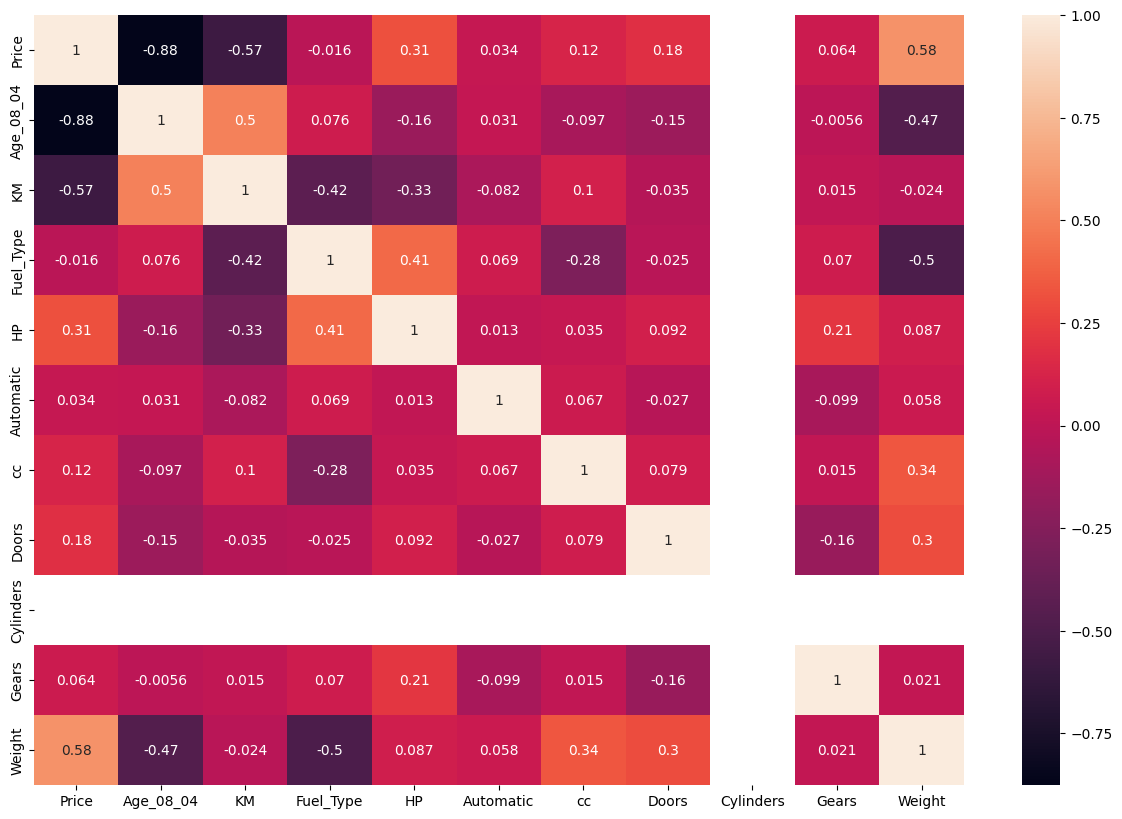

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)

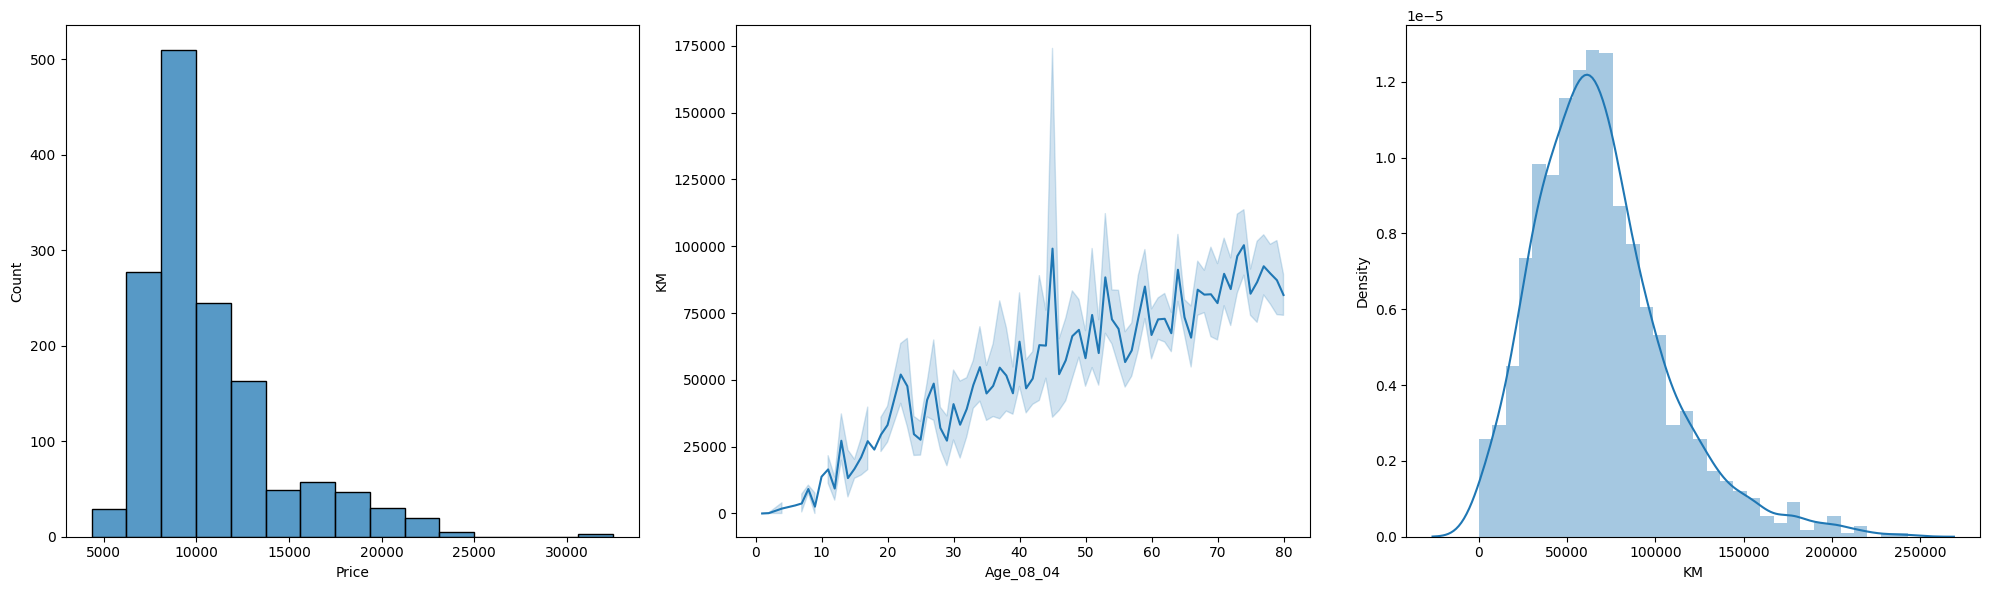

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.histplot(dt['Price'],bins=15)
plt.subplot(1,3,2)
sns.lineplot(data=dt,x=dt['Age_08_04'],y=dt['KM'])
plt.subplot(1,3,3)
sns.distplot(dt['KM'])
plt.tight_layout()
plt.show()

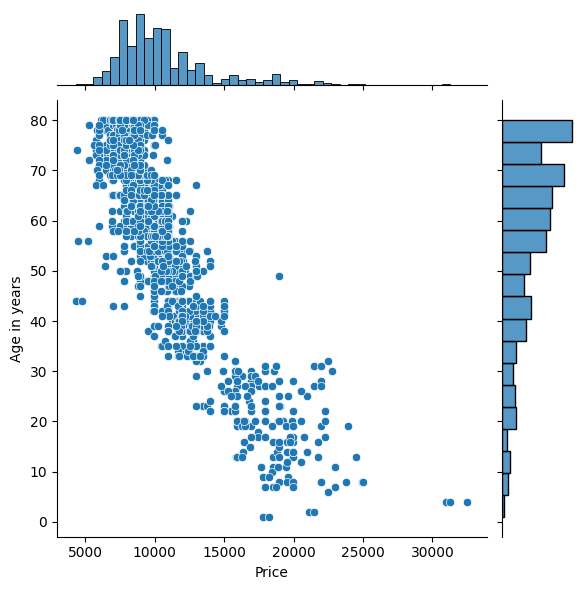

In [27]:
sns.jointplot(x=dt['Price'],y=dt['Age_08_04'])
plt.xlabel('Price')
plt.ylabel('Age in years')
plt.show()

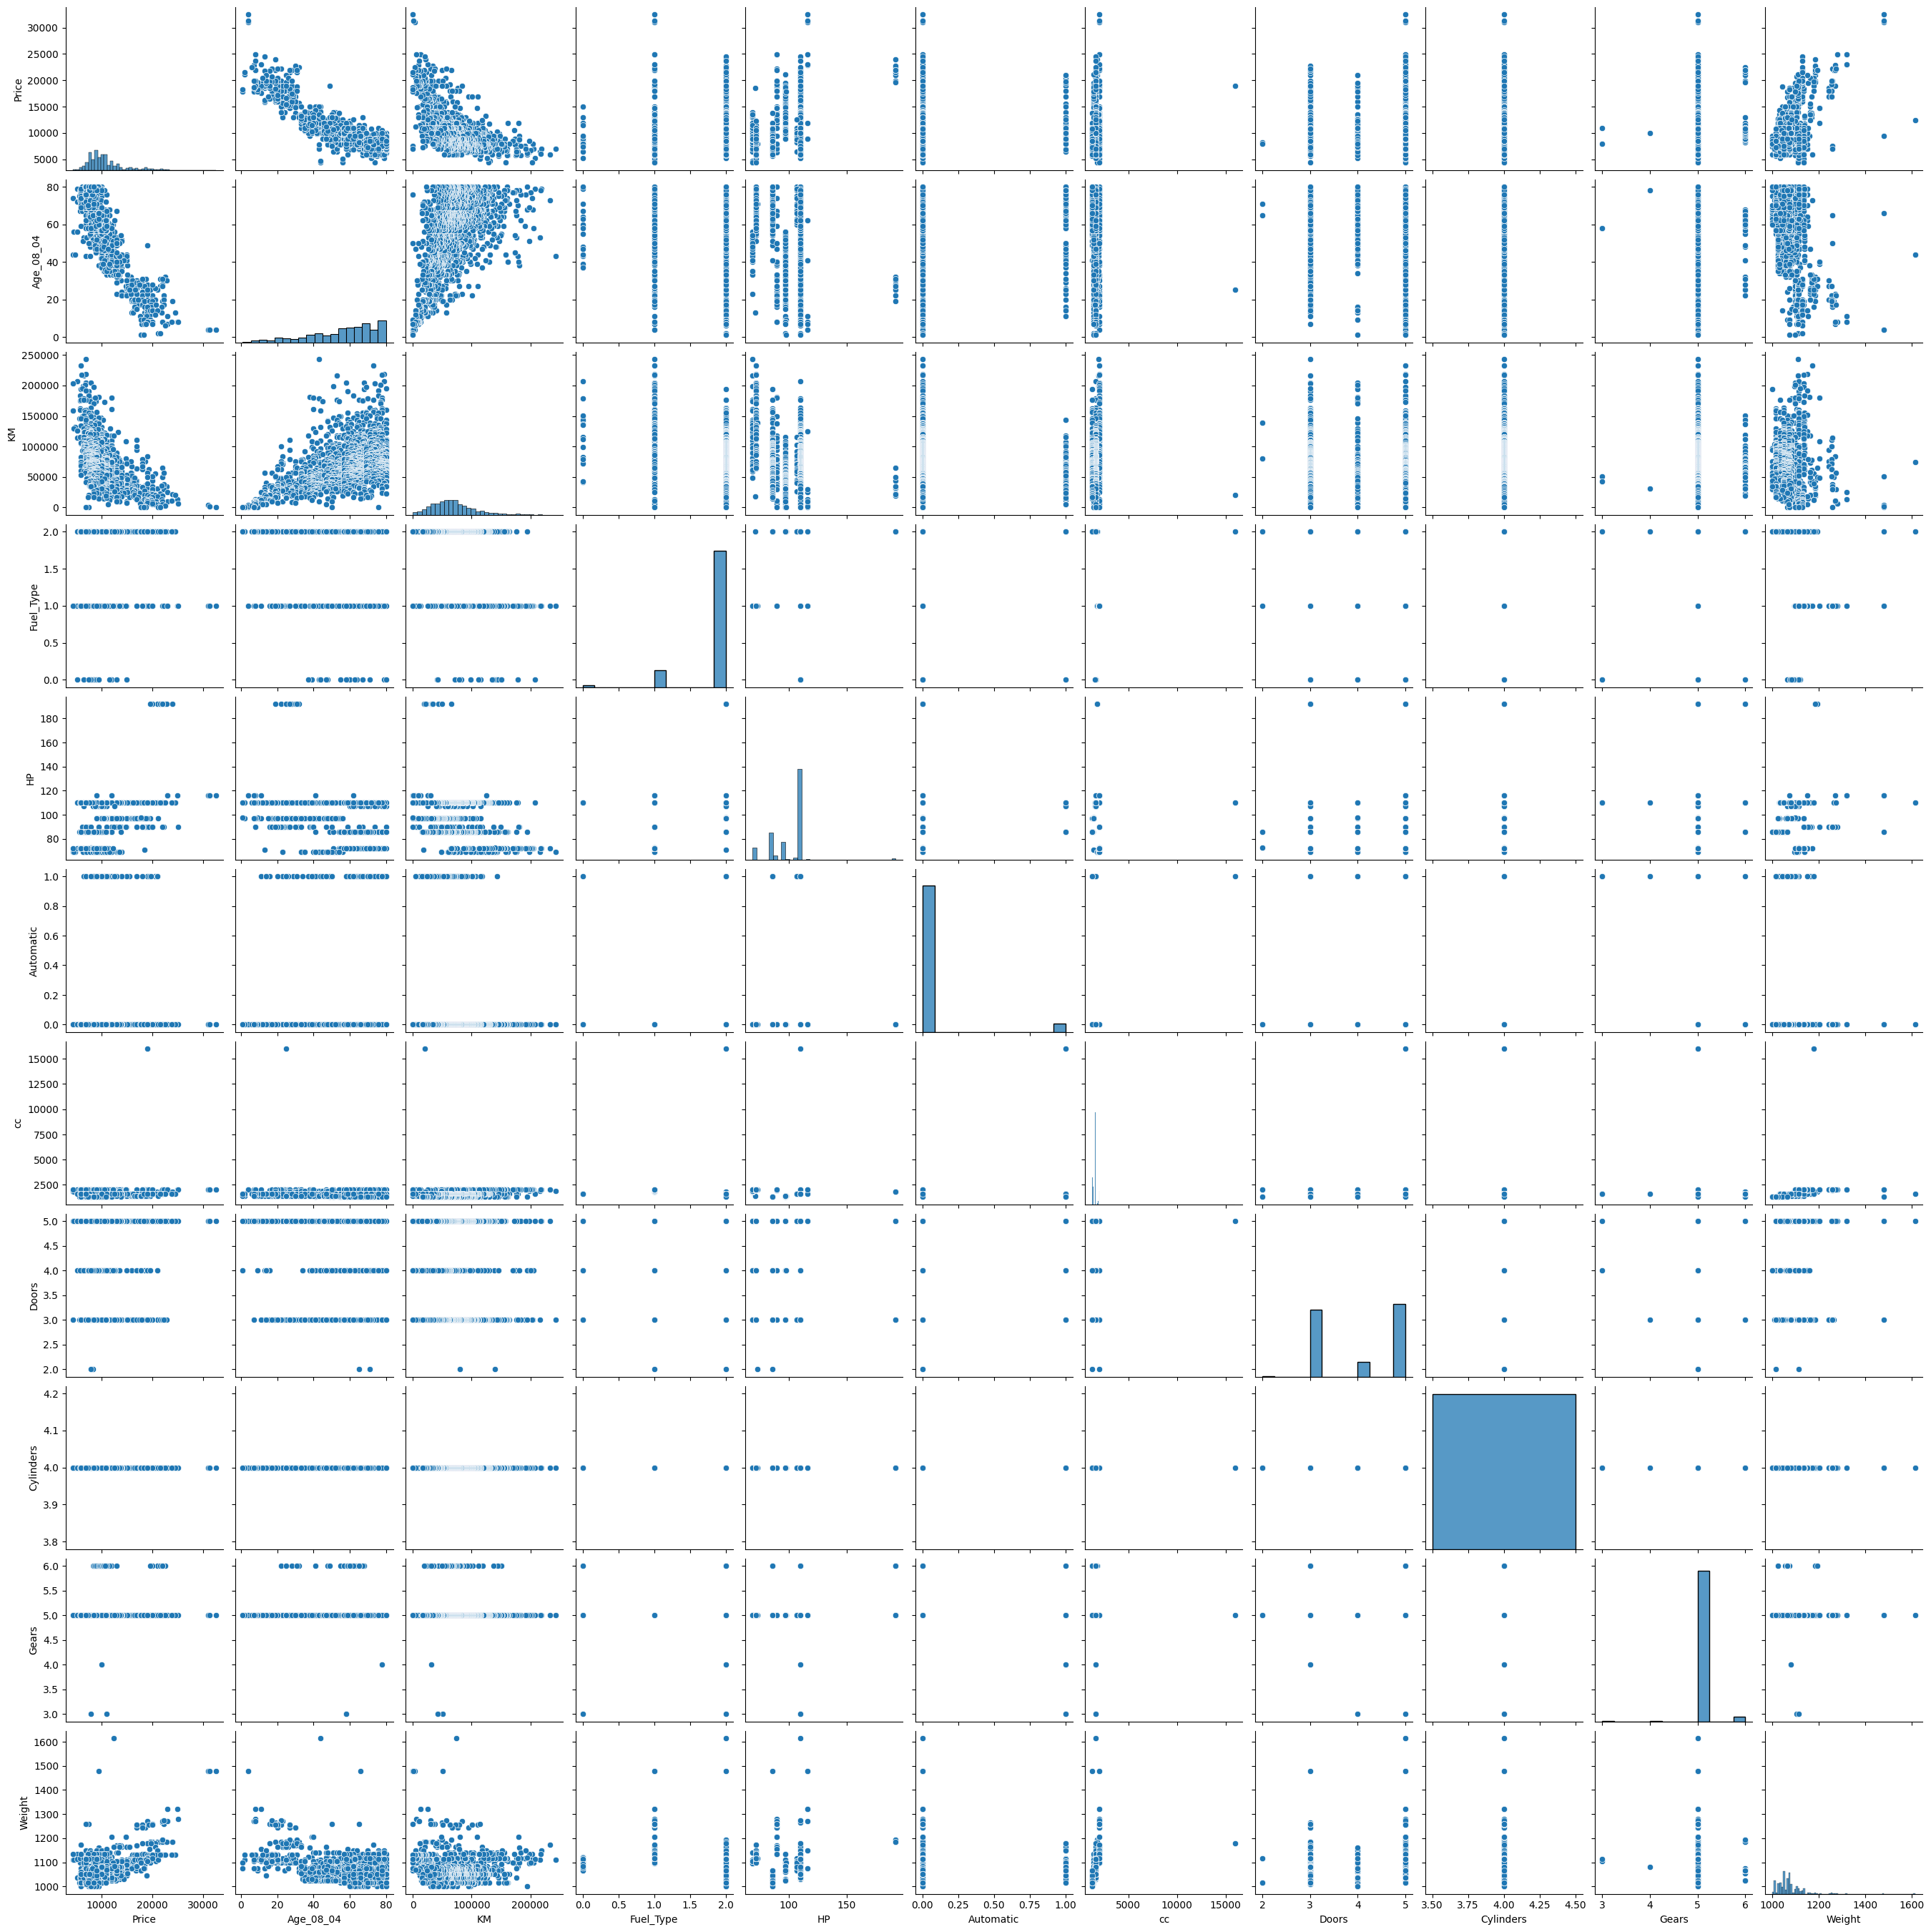

In [26]:
sns.pairplot(dt)
plt.show()

- INFERENCE FROM VISUALIZATION
  - from the above graph we clearly see the impact made by Age in range of price, as the Age of the car increases the price is always decreases
  - KM increases as the age of the car increases
  - from heatmap of correlation we can understand that price is Strongly negative correlated with AGE,KM,
  - Weight have a moderately postive correlated with Price

## Statistics

In [30]:
mean=dt.mean()
median=dt.median()
mode=dt.mode().iloc[0]
std=dt.std()
pd.concat([mean,mode,median,std],axis=1,keys=["mean","mode","median","std"])

,mean,mode,median,std
Price,10720.915679,8950,9900.0,3608.732978
Age_08_04,55.980488,68,61.0,18.563312
KM,68571.782578,36000,63451.0,37491.094553
Fuel_Type,1.868990,2,2.0,0.370993
HP,101.491986,110,110.0,14.981408
Automatic,0.055749,0,0.0,0.229517
cc,1576.560976,1600,1600.0,424.387533
Doors,4.032753,5,4.0,0.952667
Cylinders,4.000000,4,4.0,0.000000
Gears,5.026481,5,5.0,0.188575


# 2.Split the dataset into training and testing sets

In [31]:
from sklearn.model_selection import train_test_split
x=dt.drop('Price',axis=1)
y=dt['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 3.Build a multiple linear regression model

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

## MODEL 1

In [41]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [37]:
print(model1.score(x_train,y_train))
print(model1.score(x_test,y_test))

0.8694838434310366
0.832747199599305


In [39]:
print("Intercept:",model1.intercept_)
print("Coefficients:",model1.coef_)

Intercept: -12491.869433354335
Coefficients: [-1.21861473e+02 -1.68225953e-02  8.47820421e+02  2.35867776e+01
  3.75454990e+02 -9.66412838e-02 -6.04109417e+01 -2.27373675e-13
  4.48000381e+02  2.36278733e+01]


## MODEL 2

In [40]:
model2=Lasso(alpha=0.1)
model2.fit(x_train,y_train)

Lasso(alpha=0.1)

In [43]:
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))

0.8694837882033399
0.8327660828930633


In [42]:
print("Intercept:",model2.intercept_)
print("Coefficients:",model2.coef_)

Intercept: -12467.018944420382
Coefficients: [-1.21855995e+02 -1.68292095e-02  8.46155526e+02  2.36091811e+01
  3.73417351e+02 -9.66417671e-02 -6.03672016e+01  0.00000000e+00
  4.44407690e+02  2.36223919e+01]


## MODEL 3

In [44]:
model3=Ridge(alpha=0.1)
model3.fit(x_train,y_train)

Ridge(alpha=0.1)

In [45]:
print(model3.score(x_train,y_train))
print(model3.score(x_test,y_test))

0.8694838306317283
0.8327621197437906


In [46]:
print("Intercept:",model3.intercept_)
print("Coefficients:",model3.coef_)

Intercept: -12478.422908696732
Coefficients: [-1.21859416e+02 -1.68270629e-02  8.46526458e+02  2.36014941e+01
  3.74892306e+02 -9.66824592e-02 -6.04061190e+01  0.00000000e+00
  4.46560700e+02  2.36231923e+01]


# 4.Evaluate the performance

In [47]:
print("R2 score of")
print("Model1:",model1.score(x_test,y_test))
print("Model2:",model2.score(x_test,y_test))
print("Model3:",model3.score(x_test,y_test))

R2 score of
Model1: 0.832747199599305
Model2: 0.8327660828930633
Model3: 0.8327621197437906


In [49]:
print("MSE of")
print("Model1:",mean_squared_error(y_test,model1.predict(x_test)))
print("Model2:",mean_squared_error(y_test,model2.predict(x_test)))
print("Model3:",mean_squared_error(y_test,model3.predict(x_test)))

MSE of
Model1: 2006554.2201165322
Model2: 2006327.6747152614
Model3: 2006375.2211472443


# 5.Apply Lasso and Ridge methods on the model

In [50]:
# Lasso Regression
alpha_lasso = 0.1  # Hyperparameter alpha for Lasso regularization
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(x_train,y_train)
lasso_coefficients = lasso_model.coef_

In [54]:
print("Lasso Coefficients:")
for column, coef in zip(dt.columns[1:], lasso_coefficients):
    print(f"{column}: {coef}")

Lasso Coefficients:
Age_08_04: -121.85599478756535
KM: -0.01682920947147109
Fuel_Type: 846.1555258852177
HP: 23.609181065928762
Automatic: 373.4173511463156
cc: -0.0966417670600478
Doors: -60.3672015845855
Cylinders: 0.0
Gears: 444.40768967298993
Weight: 23.62239190740082


In [55]:
# Ridge Regression
alpha_ridge = 1.0  # Hyperparameter alpha for Ridge regularization
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(x_train,y_train)
ridge_coefficients = ridge_model.coef_

In [56]:
print("\nRidge Regression Coefficients:")
for column, coef in zip(dt.columns[1:], ridge_coefficients):
    print(f"{column}: {coef}")


Ridge Regression Coefficients:
Age_08_04: -121.84118759521633
KM: -0.016866729685325273
Fuel_Type: 835.0571297488274
HP: 23.731363212152246
Automatic: 369.91556633422255
cc: -0.09704708926376764
Doors: -60.35502403647041
Cylinders: 0.0
Gears: 433.9971249860669
Weight: 23.581645976887977


# Interview Questions

### 1. What is Normalization & Standardization and how is it helpful?

* Normalization:

  - Typically scales data to a range of [0, 1].
  - Use this when you don't know the distribution of your data or when you know the distribution is not Gaussian.
  - Sensitive to outliers.

* Standardization:

  - Transforms data to have a mean of 0 and a standard deviation of 1.
  - Use this when your data has a Gaussian distribution.
  - Less sensitive to outliers.

### 2. What techniques can be used to address multicollinearity in multiple linear regression?

- Use techniques like Variance Inflation Factor (VIF) to identify highly correlated features
- Remove one of the correlated features. Choose the one that is less theoretically important
- Create new features by combining the correlated features
- Use regularization methods like Ridge or Lasso

#Assumptions made during the analysis:

* The data is representative of the population.
* The relationship between the independent variables and the dependent variable is linear.

# Implications of assumptions:

* Violation of these assumptions may lead to biased estimates and incorrect inferences. It's important to validate these assumptions before interpreting the results.